# Urban DataMart Exploration for Chicago, IL

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

## Load Source Tables

The `ID_TREE` table contains information about individual trees.

In [2]:
df_id_tree = pd.read_csv('./data/Urban DataMart/Chicago_IL_CSV/ID_TREE.csv')
print('Records:', len(df_id_tree))
print('Columns:', list(df_id_tree.columns))
df_id_tree[:1]

Records: 2138
Columns: ['PLOTID', 'VISIT_NBR', 'STATECD', 'UNITCD', 'COUNTYCD', 'RETIRED_PLOT', 'SUBP', 'CONDID', 'TREE', 'STEM', 'MOTHER_TREE', 'OFFSET_POINT', 'DIST', 'AZIMUTH', 'STATUSCD', 'TREECLCD', 'SPCD', 'SPGRPCD', 'STANDING_DEAD_CD', 'UTILCLCD', 'MORTYR', 'DIA', 'DIACHECK', 'DIAHTCD', 'LTDMP', 'TOTAL_LENGTH', 'ACTUAL_LENGTH', 'HTCD', 'ABNORMAL_STEM_TERMINATION', 'RECONCILECD', 'BOLE_STUMP_REMOVED', 'FIELD_PREV_DIA', 'FIELD_PREV_STATUS_CD', 'FIELD_PREV_NBR_STEMS', 'CROWN_CLASS_CD', 'COMP_CROWN_RATIO', 'DMG_ROOT_STEM_GIRDLING', 'DMG_TRUNK_BARK_INCLUSION', 'DMG_TOPPING_PRUNING', 'DMG_EXCESS_MULCH', 'DMG_SIDEWALK_ROOT_CONFLICT', 'DMG_OVERHEAD_WIRES', 'DMG_IMPROPER_PLANTING', 'DAMAGE_AGENT_1', 'DAMAGE_AGENT_2', 'DAMAGE_AGENT_3', 'NBR_STEMS', 'CULL_FLD', 'ROUGHCULL', 'CAUSE_OF_DEATH', 'DECAYCD', 'MORTALITY_CD', 'TREECLCD_NRS', 'TREECLCD_SRS', 'TREECLCD_PNWRS', 'TREECLCD_RMRS', 'TREE_GRADE', 'TREE_SITE_INDEX', 'BASAL_AREA', 'TPA_UNADJ', 'CARBON_AG', 'CARBON_BG', 'DRYBIO_AG', 'DRYBIO_

,PLOTID,VISIT_NBR,STATECD,UNITCD,COUNTYCD,RETIRED_PLOT,SUBP,CONDID,TREE,STEM,MOTHER_TREE,OFFSET_POINT,DIST,AZIMUTH,STATUSCD,TREECLCD,SPCD,SPGRPCD,STANDING_DEAD_CD,UTILCLCD,MORTYR,DIA,DIACHECK,DIAHTCD,LTDMP,TOTAL_LENGTH,ACTUAL_LENGTH,HTCD,ABNORMAL_STEM_TERMINATION,RECONCILECD,BOLE_STUMP_REMOVED,FIELD_PREV_DIA,FIELD_PREV_STATUS_CD,FIELD_PREV_NBR_STEMS,CROWN_CLASS_CD,COMP_CROWN_RATIO,DMG_ROOT_STEM_GIRDLING,DMG_TRUNK_BARK_INCLUSION,DMG_TOPPING_PRUNING,DMG_EXCESS_MULCH,DMG_SIDEWALK_ROOT_CONFLICT,DMG_OVERHEAD_WIRES,DMG_IMPROPER_PLANTING,DAMAGE_AGENT_1,DAMAGE_AGENT_2,DAMAGE_AGENT_3,NBR_STEMS,CULL_FLD,ROUGHCULL,CAUSE_OF_DEATH,DECAYCD,MORTALITY_CD,TREECLCD_NRS,TREECLCD_SRS,TREECLCD_PNWRS,TREECLCD_RMRS,TREE_GRADE,TREE_SITE_INDEX,BASAL_AREA,TPA_UNADJ,CARBON_AG,CARBON_BG,DRYBIO_AG,DRYBIO_BG,DRYBIO_BOLE,DRYBIO_BOLE_BARK,DRYBIO_BRANCH,DRYBIO_FOLIAGE,DRYBIO_SAWLOG,DRYBIO_SAWLOG_BARK,DRYBIO_STEM,DRYBIO_STEM_BARK,DRYBIO_STUMP,DRYBIO_STUMP_BARK,VOLBFGRS,VOLBFNET,VOLBSGRS,VOLBSNET,VOLCFGRS,VOLCFGRS_BARK,VOLCFGRS_STUMP,VOLCFGRS_STUMP_BARK,VOLCFGRS_TOP,VOLCFGRS_TOP_BARK,VOLCFNET,VOLCFNET_BARK,VOLCFSND,VOLCFSND_BARK,VOLCFSND_STUMP,VOLCFSND_STUMP_BARK,VOLCFSND_TOP,VOLCFSND_TOP_BARK,VOLCSGRS,VOLCSGRS_BARK,VOLCSNET,VOLCSNET_BARK,VOLCSSND,VOLCSSND_BARK,VOLTSGRS,VOLTSGRS_BARK,VOLTSSND,VOLTSSND_BARK,CN,PLT_CN,SBP_CN,CND_CN,MTRE_CN,PREV_PLT_CN,PREV_TRE_CN
0,1915119,4,18,4,127,20096,1,1,20,20,NaN,NaN,NaN,NaN,1,2.0,972,41,NaN,NaN,NaN,7.7,0.0,1,NaN,55.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,73.0,0.323368,6.018046,139.025654,25.581387,291.458395,53.629742,170.099862,22.310469,63.234442,6.246563,NaN,NaN,201.760803,26.46315,14.343245,1.881274,NaN,NaN,NaN,NaN,5.86057,0.973352,0.494178,0.082076,0.596659,0.099096,5.743359,0.963619,5.801965,0.973352,0.489236,0.082076,0.590692,0.099096,NaN,NaN,NaN,NaN,NaN,NaN,6.951407,1.154524,6.881893,1.154524,942084333290487,352769580489998,942084252290487,942084249290487,942084292290487,NaN,NaN


The `REF_PLANT_DICTIONARY` table contains information about plant species as defined by the Natural Resources Conservation Service (NRCS) for the PLANTS database (see also https://plants.usda.gov).

In [3]:
df_ref_plant_dictionary = pd.read_csv('./data/Urban DataMart/Chicago_IL_CSV/REF_PLANT_DICTIONARY.csv', low_memory=False)
print('Records:', len(df_ref_plant_dictionary))
print('Columns:', list(df_ref_plant_dictionary.columns))
df_ref_plant_dictionary[:1]

Records: 81489
Columns: ['CN', 'SYMBOL_TYPE', 'SYMBOL', 'SCIENTIFIC_NAME', 'NEW_SYMBOL', 'NEW_SCIENTIFIC_NAME', 'COMMON_NAME', 'CATEGORY', 'FAMILY', 'GROWTH_HABIT', 'DURATION', 'US_NATIVITY', 'STATE_DISTRIBUTION', 'STATE_AND_PROVINCE', 'SCIENTIFIC_NAME_W_AUTHOR', 'GENERA_BINOMIAL_AUTHOR', 'TRINOMIAL_AUTHOR', 'QUADRINOMIAL_AUTHOR', 'XGENUS', 'GENUS', 'XSPECIES', 'SPECIES', 'SSP', 'XSUBSPECIES', 'SUBSPECIES', 'VAR', 'XVARIETY', 'VARIETY', 'SUBVAR', 'SUBVARIETY', 'F', 'FORMA', 'NOTES', 'CREATED_BY', 'CREATED_DATE', 'CREATED_IN_INSTANCE', 'MODIFIED_BY', 'MODIFIED_DATE', 'MODIFIED_IN_INSTANCE']


,CN,SYMBOL_TYPE,SYMBOL,SCIENTIFIC_NAME,NEW_SYMBOL,NEW_SCIENTIFIC_NAME,COMMON_NAME,CATEGORY,FAMILY,GROWTH_HABIT,DURATION,US_NATIVITY,STATE_DISTRIBUTION,STATE_AND_PROVINCE,SCIENTIFIC_NAME_W_AUTHOR,GENERA_BINOMIAL_AUTHOR,TRINOMIAL_AUTHOR,QUADRINOMIAL_AUTHOR,XGENUS,GENUS,XSPECIES,SPECIES,SSP,XSUBSPECIES,SUBSPECIES,VAR,XVARIETY,VARIETY,SUBVAR,SUBVARIETY,F,FORMA,NOTES,CREATED_BY,CREATED_DATE,CREATED_IN_INSTANCE,MODIFIED_BY,MODIFIED_DATE,MODIFIED_IN_INSTANCE
0,503517201126144,Old,NOFR3,Nothoscordum fragrans,NOBO,Nothoscordum borbonicum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nothoscordum fragrans auct. non (Vent.) Kunth,auct. non (Vent.) Kunth,NaN,NaN,NaN,Nothoscordum,NaN,fragrans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ERICHDODSON,2018-02-09 12:59:36,126144,ERICHDODSON,2018-02-12 11:12:26,126144.0


The `REF_SPECIES` table contains a reference of species codes in the `SPCD` column.

In [4]:
df_ref_species = pd.read_csv('./data/Urban DataMart/Chicago_IL_CSV/REF_SPECIES.csv')
print('Records:', len(df_ref_species))
print('Columns:', list(df_ref_species.columns))
df_ref_species[:1]

Records: 2697
Columns: ['SPCD', 'COMMON_NAME', 'SHARED_COMMON_NAME_IND', 'GENUS', 'SPECIES', 'VARIETY', 'SUBSPECIES', 'SCIENTIFIC_NAME', 'SPECIES_SYMBOL', 'E_SPGRPCD', 'W_SPGRPCD', 'C_SPGRPCD', 'P_SPGRPCD', 'MAJOR_SPGRPCD', 'STOCKING_SPGRPCD', 'FOREST_TYPE_SPGRPCD', 'JENKINS_SPGRPCD', 'JENKINS_SAPLING_ADJUSTMENT', 'SITETREE', 'SFTWD_HRDWD', 'WOODLAND', 'WOOD_SPGR_GREENVOL_DRYWT', 'WOOD_SPGR_GREENVOL_DRYWT_CIT', 'BARK_SPGR_GREENVOL_DRYWT', 'BARK_SPGR_GREENVOL_DRYWT_CIT', 'MC_PCT_GREEN_WOOD', 'MC_PCT_GREEN_WOOD_CIT', 'MC_PCT_GREEN_BARK', 'MC_PCT_GREEN_BARK_CIT', 'BARK_VOL_PCT', 'BARK_VOL_PCT_CIT', 'CWD_DECAY_RATIO1', 'CWD_DECAY_RATIO2', 'CWD_DECAY_RATIO3', 'CWD_DECAY_RATIO4', 'CWD_DECAY_RATIO5', 'DWM_CARBON_RATIO', 'CARBON_RATIO_LIVE', 'DRYWT_TO_GREENWT_CONVERSION', 'CREATED_DATE', 'MODIFIED_DATE']


,SPCD,COMMON_NAME,SHARED_COMMON_NAME_IND,GENUS,SPECIES,VARIETY,SUBSPECIES,SCIENTIFIC_NAME,SPECIES_SYMBOL,E_SPGRPCD,W_SPGRPCD,C_SPGRPCD,P_SPGRPCD,MAJOR_SPGRPCD,STOCKING_SPGRPCD,FOREST_TYPE_SPGRPCD,JENKINS_SPGRPCD,JENKINS_SAPLING_ADJUSTMENT,SITETREE,SFTWD_HRDWD,WOODLAND,WOOD_SPGR_GREENVOL_DRYWT,WOOD_SPGR_GREENVOL_DRYWT_CIT,BARK_SPGR_GREENVOL_DRYWT,BARK_SPGR_GREENVOL_DRYWT_CIT,MC_PCT_GREEN_WOOD,MC_PCT_GREEN_WOOD_CIT,MC_PCT_GREEN_BARK,MC_PCT_GREEN_BARK_CIT,BARK_VOL_PCT,BARK_VOL_PCT_CIT,CWD_DECAY_RATIO1,CWD_DECAY_RATIO2,CWD_DECAY_RATIO3,CWD_DECAY_RATIO4,CWD_DECAY_RATIO5,DWM_CARBON_RATIO,CARBON_RATIO_LIVE,DRYWT_TO_GREENWT_CONVERSION,CREATED_DATE,MODIFIED_DATE
0,6012,spineless wattle,N,Acacia,muricata,NaN,NaN,Acacia muricata,ACMU,54.0,54.0,54.0,NaN,3,37.0,227.0,8,0.84031,NaN,H,N,0.52,26.0,0.53,26.0,75.13,26.0,80.49,26.0,15.16,26.0,1.0,0.78,0.45,0.42,0.42,0.491,0.475,1.758474,2021-09-03 22:38:53,NaN


The `REF_TREE_STATUS` table stores reference data for the `STATUSCD` attribute in the `ID_MOTHER_TREE` and `ID_TREE` tables. Code for this attribute indicates the status of a tree at the time of measurement.

In [5]:
TREE_STATUS_LIVE = 1
TREE_STATUS_DEAD = 2

df_ref_tree_status = pd.read_csv('./data/Urban DataMart/Chicago_IL_CSV/REF_TREE_STATUS.csv')
print('Records:', len(df_ref_tree_status))
print('Columns:', list(df_ref_tree_status.columns))
df_ref_tree_status

Records: 5
Columns: ['VALUE', 'ABBR', 'MEANING', 'RETIRED']


,VALUE,ABBR,MEANING,RETIRED
0,0,No Status,No status – tree is not presently in the sample (remeasurement plots only).,N
1,1,Live,Live tree,N
2,2,Dead,Dead tree,N
3,3,Cut & Utilized,"Cut & Utilized – Collected on remeasurement trees only. A tree that occupied a forested condition in the previous inventory only. A tree that has been cut and removed by direct human activity related to harvesting, silviculture or land clearing. The tree is assumed to have been utilized for a commercial purposes, such as timber, chips, or firewood, and noncommercial purposes such as domestic firewood, landscaping, and fence posts.",N
4,4,Removed,"Removed – Collected on remeasurement trees only. A tree that has been removed by direct human activity but not likely utilized for a commercial product, such as timber, chips, or firewood, and noncommercial purposes such as domestic firewood, landscaping, and fence posts.",N


## Questions and Answers

Which species are represented in the `ID_TREE` table?

In [6]:
df = pd.merge(
    df_id_tree[['SPCD']],
    df_ref_species[['SPCD', 'COMMON_NAME', 'GENUS', 'SPECIES']],
    left_on='SPCD',
    right_on='SPCD',
    how='left',
)
df.value_counts()

SPCD  COMMON_NAME               GENUS         SPECIES      
6918  common buckthorn          Rhamnus       cathartica       274
317   silver maple              Acer          saccharinum      181
681   white mulberry            Morus         alba             147
742   eastern cottonwood        Populus       deltoides        127
762   black cherry              Prunus        serotina         122
313   boxelder                  Acer          negundo          105
544   green ash                 Fraxinus      pennsylvanica     81
972   American elm              Ulmus         americana         78
320   Norway maple              Acer          platanoides       75
951   American basswood         Tilia         americana         53
552   honeylocust               Gleditsia     triacanthos       45
823   bur oak                   Quercus       macrocarpa        45
974   Siberian elm              Ulmus         pumila            45
837   black oak                 Quercus       velutina          40
93

What distribution of tree in `ID_TREE` are living, dead, or in another status?

In [7]:
df_id_tree_live = df_id_tree[df_id_tree['STATUSCD'] == TREE_STATUS_LIVE]
df_id_tree_dead = df_id_tree[df_id_tree['STATUSCD'] == TREE_STATUS_DEAD]

df = pd.merge(
    df_id_tree[['STATUSCD']],
    df_ref_tree_status[['VALUE', 'ABBR']],
    left_on='STATUSCD',
    right_on='VALUE',
    how='left',
)
df = df.drop('VALUE', axis=1)
df.value_counts()

STATUSCD  ABBR          
1         Live              1863
2         Dead               217
0         No Status           31
3         Cut & Utilized      23
4         Removed              4
Name: count, dtype: int64

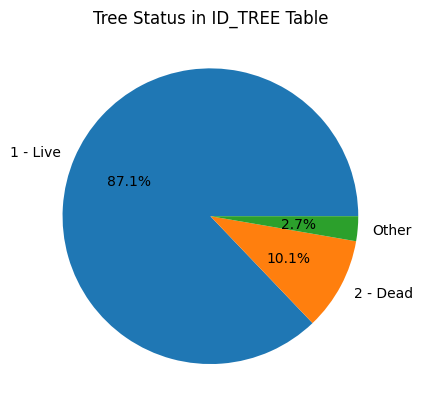

In [8]:
df_labeled = df['STATUSCD'].astype('str') + ' - ' + df['ABBR']
df_labeled_counts = df_labeled.value_counts()

threshold = 35  # Determined by fiddling.
df_labeled_filtered = df_labeled_counts[df_labeled_counts >= threshold]
df_labeled_others = df_labeled_counts[df_labeled_counts < threshold].sum()

df_labeled_final = df_labeled_filtered.copy()
if df_labeled_others > 0:
    df_labeled_final['Other'] = df_labeled_others

ax = df_labeled_final.plot.pie(
    title='Tree Status in ID_TREE Table',
    autopct='%1.1f%%',
)
ax.set_ylabel('')
pass

Which species of trees are living or dead in the `ID_TREE` table?

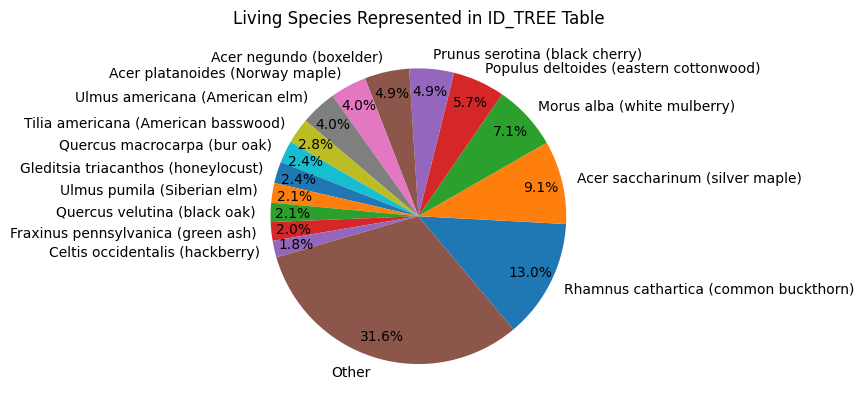

In [9]:
df = pd.merge(
    df_id_tree_live[['SPCD', 'STATUSCD']],
    df_ref_species[['SPCD', 'COMMON_NAME', 'GENUS', 'SPECIES']],
    left_on='SPCD',
    right_on='SPCD',
    how='left',
)

df_labeled = df['GENUS'] + ' ' + df['SPECIES'] + ' (' + df['COMMON_NAME'] + ')'
df_labeled_counts = df_labeled.value_counts()

threshold = 30  # Determined by fiddling.
df_labeled_filtered = df_labeled_counts[df_labeled_counts >= threshold]
df_labeled_others = df_labeled_counts[df_labeled_counts < threshold].sum()

df_labeled_final = df_labeled_filtered.copy()
if df_labeled_others > 0:
    df_labeled_final['Other'] = df_labeled_others

ax = df_labeled_final.plot.pie(
    title='Living Species Represented in ID_TREE Table',
    autopct='%1.1f%%',
    pctdistance=0.85,
    startangle=-50,
)
ax.set_ylabel('')
pass

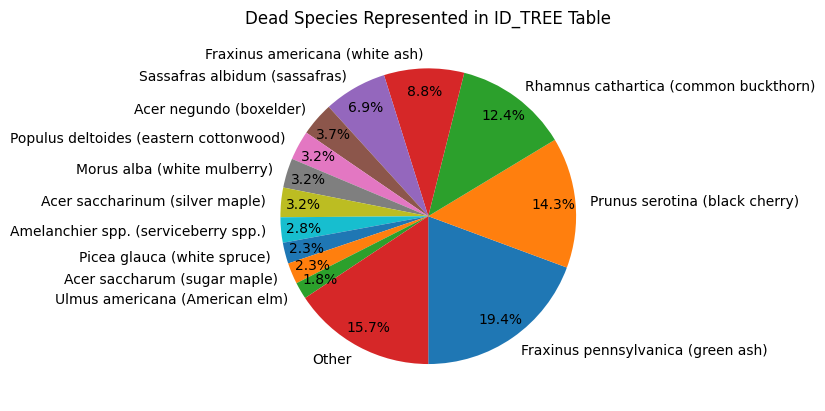

In [10]:
df = pd.merge(
    df_id_tree_dead[['SPCD', 'STATUSCD']],
    df_ref_species[['SPCD', 'COMMON_NAME', 'GENUS', 'SPECIES']],
    left_on='SPCD',
    right_on='SPCD',
    how='left',
)

df_labeled = df['GENUS'] + ' ' + df['SPECIES'] + ' (' + df['COMMON_NAME'] + ')'
df_labeled_counts = df_labeled.value_counts()

threshold = 4  # Determined by fiddling.
df_labeled_filtered = df_labeled_counts[df_labeled_counts >= threshold]
df_labeled_others = df_labeled_counts[df_labeled_counts < threshold].sum()

df_labeled_final = df_labeled_filtered.copy()
if df_labeled_others > 0:
    df_labeled_final['Other'] = df_labeled_others

ax = df_labeled_final.plot.pie(
    title='Dead Species Represented in ID_TREE Table',
    autopct='%1.1f%%',
    pctdistance=0.85,
    startangle=-90,  # Determined by fiddling
)
ax.set_ylabel('')
pass

Which species of trees are native to Illinois?

In [11]:
df_native = df_ref_plant_dictionary[(
    (
        (
            df_ref_plant_dictionary['US_NATIVITY'].str.contains('L48(N', na=False, regex=False)  # Native or pobably native in lower 48.
            & ~df_ref_plant_dictionary['US_NATIVITY'].str.contains('IL(I', na=False, regex=False)  # Not invasive in Illinois.
        )
        | df_ref_plant_dictionary['US_NATIVITY'].str.contains('IL(N', na=False, regex=False)  # Native or probably native in Illinois.
    )
    & df_ref_plant_dictionary['STATE_DISTRIBUTION'].str.contains('IL', na=False)  # Is in Illinois.
    & (df_ref_plant_dictionary['SYMBOL_TYPE'] == 'Species')  # Identifies a species (as opposed to a genus).
    & (df_ref_plant_dictionary['VAR'].isna())  # Is not a variety.
    & (df_ref_plant_dictionary['SSP'].isna())  # Is not a subspecies.
    & (df_ref_plant_dictionary['GROWTH_HABIT'] == 'Tree')  # Is a tree.
)]
df_native[['GENUS', 'SPECIES', 'COMMON_NAME']].sort_values(by=['GENUS', 'SPECIES'])

,GENUS,SPECIES,COMMON_NAME
28025,Acer,floridanum,southern sugar maple
28055,Acer,negundo,boxelder
28421,Acer,nigrum,black maple
25821,Acer,rubrum,red maple
25235,Acer,saccharinum,silver maple
28283,Aesculus,glabra,Ohio buckeye
25243,Aesculus,marylandica,buckeye
37826,Betula,alleghaniensis,yellow birch
37860,Betula,nigra,river birch
37865,Betula,papyrifera,paper birch


Which living trees in `ID_TREES` are native and non-native?

In [12]:
df_trees_nativity = pd.merge(
    df_id_tree_live[['SPCD']],
    df_ref_species[['SPCD', 'COMMON_NAME', 'GENUS', 'SPECIES']],
    left_on='SPCD',
    right_on='SPCD',
    how='left',
)
df_trees_nativity = pd.merge(
    df_trees_nativity,
    df_native[['CN', 'GENUS', 'SPECIES']],
    on=['GENUS', 'SPECIES'],
    how='left',
)
df_trees_nativity['NATIVITY'] = df_trees_nativity['CN'].notna().map({True: 'native', False: 'non-native'})
df_trees_nativity = df_trees_nativity.drop('CN', axis=1)
df_trees_nativity.value_counts()

SPCD  COMMON_NAME               GENUS         SPECIES        NATIVITY  
6918  common buckthorn          Rhamnus       cathartica     non-native    243
317   silver maple              Acer          saccharinum    native        170
681   white mulberry            Morus         alba           non-native    133
742   eastern cottonwood        Populus       deltoides      native        106
762   black cherry              Prunus        serotina       non-native     91
313   boxelder                  Acer          negundo        native         91
320   Norway maple              Acer          platanoides    non-native     74
972   American elm              Ulmus         americana      native         74
951   American basswood         Tilia         americana      native         52
823   bur oak                   Quercus       macrocarpa     non-native     45
552   honeylocust               Gleditsia     triacanthos    non-native     44
974   Siberian elm              Ulmus         pumila       

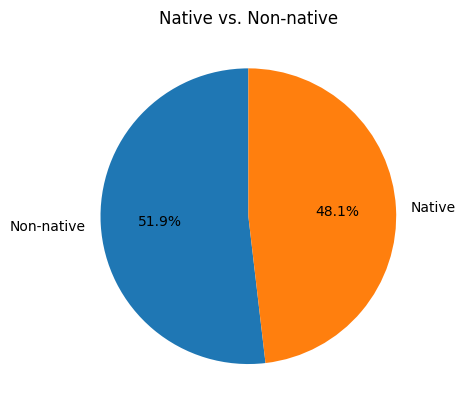

In [13]:
ax = df_trees_nativity['NATIVITY'].map({'native': 'Native', 'non-native': 'Non-native'}).value_counts().plot.pie(
    title = 'Native vs. Non-native',
    autopct='%1.1f%%',
    startangle=90,
)
ax.set_ylabel('')
pass

Which living, native trees are represented in the `ID_TREE` table?

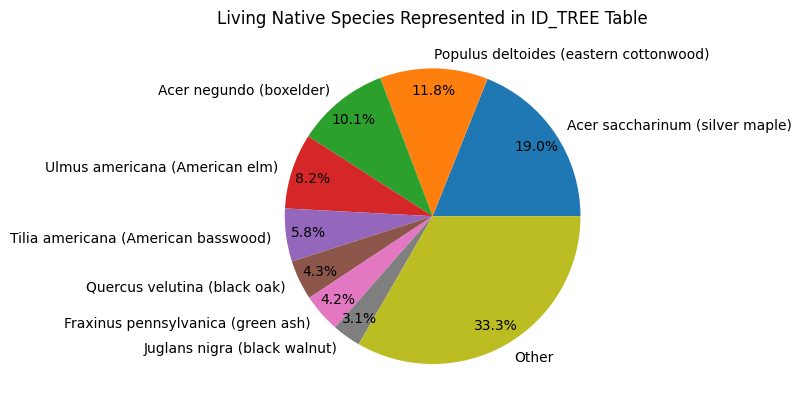

In [14]:
df = df_trees_nativity[df_trees_nativity['NATIVITY'] == 'native']

df_labeled = df['GENUS'] + ' ' + df['SPECIES'] + ' (' + df['COMMON_NAME'] + ')'
df_labeled_counts = df_labeled.value_counts()

threshold = 28  # Determined by fiddling.
df_labeled_filtered = df_labeled_counts[df_labeled_counts >= threshold]
df_labeled_others = df_labeled_counts[df_labeled_counts < threshold].sum()

df_labeled_final = df_labeled_filtered.copy()
if df_labeled_others > 0:
    df_labeled_final['Other'] = df_labeled_others

ax = df_labeled_final.plot.pie(
    title='Living Native Species Represented in ID_TREE Table',
    autopct='%1.1f%%',
    pctdistance=0.85,
)
ax.set_ylabel('')
pass

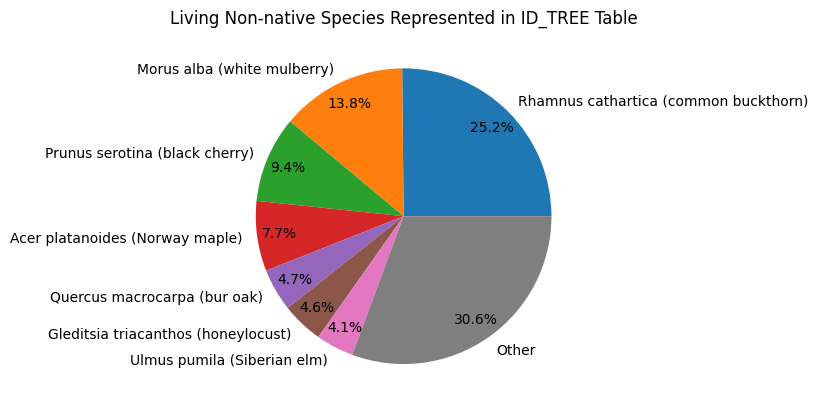

In [15]:
df = df_trees_nativity[df_trees_nativity['NATIVITY'] != 'native']

df_labeled = df['GENUS'] + ' ' + df['SPECIES'] + ' (' + df['COMMON_NAME'] + ')'
df_labeled_counts = df_labeled.value_counts()

threshold = 38  # Determined by fiddling.
df_labeled_filtered = df_labeled_counts[df_labeled_counts >= threshold]
df_labeled_others = df_labeled_counts[df_labeled_counts < threshold].sum()

df_labeled_final = df_labeled_filtered.copy()
if df_labeled_others > 0:
    df_labeled_final['Other'] = df_labeled_others

ax = df_labeled_final.plot.pie(
    title='Living Non-native Species Represented in ID_TREE Table',
    autopct='%1.1f%%',
    pctdistance=0.85,
)
ax.set_ylabel('')
pass